In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nd import LNN

%matplotlib inline

In [2]:
# Ns = np.arange(10, 2000, 50)
Ns = np.logspace(1, 4, 20, dtype='int')
kws = np.array([5, 4, 3, 2, 1])
s = 1
fishers = np.zeros((kws.size, Ns.size))

In [3]:
for N_idx, N in enumerate(Ns):
    for kw_idx, kw in enumerate(kws):
        lnn = LNN(kv=1, kw=kw, N=N, sigmaP=1)
        fishers[kw_idx, N_idx] = lnn.fisher_exp_nonlinearity(s=4)

In [5]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

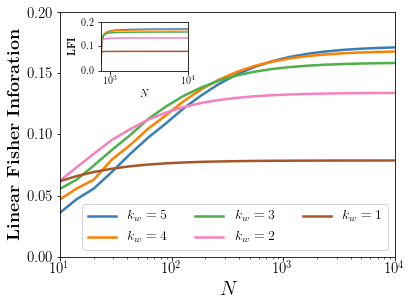

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
inset = fig.add_axes([0.22, 0.70, 0.2, 0.15])

for kw_idx, kw in enumerate(kws):
    ax.plot(Ns, fishers[kw_idx],
            color=colors[kw_idx],
            linewidth=2.5,
            label=r'$k_w=%s$' %kw)
    
    inset.plot(Ns, fishers[kw_idx],
               color=colors[kw_idx])

ax.set_xscale('log')
ax.set_xlim([10, 10000])
ax.set_ylim([0.0, 0.20])
ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax.legend(loc=4, prop={'size': 14},
          ncol=3)
ax.tick_params(labelsize=15)
ax.set_xlabel(r'$N$', fontsize=20)
ax.set_ylabel(r'\textbf{Linear Fisher Inforation}', fontsize=18)

inset.set_ylim([0, 0.20])
inset.set_xlim([10, 10000])
inset.set_xticks([1000, 10000])
inset.set_xticklabels([r'$10^3$', r'$10^4$'])
inset.set_xlabel('$N$')
inset.set_ylabel(r'\textbf{LFI}')
plt.savefig('figureS2.pdf', bbox_inches='tight')